In [84]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import time

In [85]:
def peso():
    #Obtener tipos de cambio de pesos colombianos para conversión de precios
    exchangerates='https://openexchangerates.org/api/latest.json?app_id=MI_ID&base=USD&symbols=ARS'
    r=requests.get(exchangerates).json()
    #Obtener tipos de cambio
    pesoarg=r['rates']['ARS']
    hora=r['timestamp']
    return pesoarg,hora

In [86]:
data_list = []

now = datetime.datetime.now()
end_time = datetime.datetime(now.year, now.month, 20, 8, 0, 0)
seconds_until_end = (end_time - now).total_seconds()
while (end_time - datetime.datetime.now()).total_seconds() > 0:
    pesoarg, hora = peso()
    # Append each row of data to the list
    data_list.append({'pesoarg': pesoarg, 'hora': hora})
    
    # Sleep for one hour
    time.sleep(3600) 

In [87]:
evol_peso = pd.DataFrame(data_list)

# Convert 'hora' from Unix timestamp to 'date' and 'hour' only once, after the loop.
evol_peso['date'] = pd.to_datetime(evol_peso['hora'], unit='s').dt.date
evol_peso['hour'] = pd.to_datetime(evol_peso['hora'], unit='s').dt.time
#Convertir a formato de fecha para hacer gráfica por hora
evol_peso['datetime'] = pd.to_datetime(evol_peso['hora'], unit='s')
evol_peso['hour_str'] = evol_peso['datetime'].dt.strftime('%H:%M:%S')

evol_peso

,pesoarg,hora,date,hour,datetime,hour_str
0,351.671702,1700449194,2023-11-20,02:59:54,2023-11-20 02:59:54,02:59:54
1,351.599013,1700452785,2023-11-20,03:59:45,2023-11-20 03:59:45,03:59:45
2,351.686061,1700456386,2023-11-20,04:59:46,2023-11-20 04:59:46,04:59:46
3,351.792403,1700459986,2023-11-20,05:59:46,2023-11-20 05:59:46,05:59:46
4,353.803555,1700463598,2023-11-20,06:59:58,2023-11-20 06:59:58,06:59:58
5,353.792049,1700467195,2023-11-20,07:59:55,2023-11-20 07:59:55,07:59:55
6,353.813240,1700470798,2023-11-20,08:59:58,2023-11-20 08:59:58,08:59:58
7,353.835900,1700474396,2023-11-20,09:59:56,2023-11-20 09:59:56,09:59:56
8,353.806800,1700477986,2023-11-20,10:59:46,2023-11-20 10:59:46,10:59:46
9,353.800300,1700481586,2023-11-20,11:59:46,2023-11-20 11:59:46,11:59:46


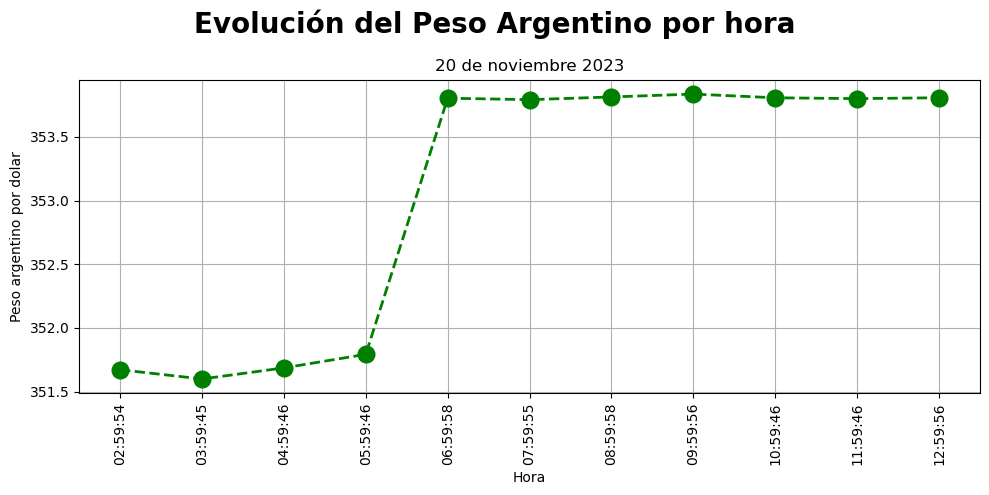

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(evol_peso["hour_str"], evol_peso['pesoarg'], color='green', 
         linestyle='dashed', linewidth=2, markersize=12,marker='o')
plt.suptitle('Evolución del Peso Argentino por hora', fontsize=20, fontweight='bold')
plt.title("20 de noviembre 2023")
plt.xlabel('Hora')
plt.ylabel('Peso argentino por dolar')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for better fit
plt.show()